In [5]:
import  pandas  as pd
import  numpy  as np
import  matplotlib.pyplot  as plt

In [6]:
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0
    
data = []
# creating an empty array
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14].strip()
        ])
data[0:2]

[[39,
  'State-gov',
  77516,
  'Bachelors',
  13,
  'Never-married',
  'Adm-clerical',
  'Not-in-family',
  'White',
  'Male',
  2174,
  0,
  40,
  'United-States',
  '<=50K'],
 [50,
  'Self-emp-not-inc',
  83311,
  'Bachelors',
  13,
  'Married-civ-spouse',
  'Exec-managerial',
  'Husband',
  'White',
  'Male',
  0,
  0,
  13,
  'United-States',
  '<=50K']]

# Worksheet 2

- What does the 'r' do in the first line?
    - Makes sure that the data is being read into R
- Describe the function chr_int in the second line
    - takes value entered and changes it
    - if the input 'a' is a digit, it turns it into an integer
    - if 'a' is not a digit then it returns 0
- Try compiling this with the 'datal = line.split(', ')' without that space, what happens?

# Worksheet 3

- What might be the best data structure to place this data in?
dataframe

In [7]:
# turn data (which is currently an array/list) into a dataframe

adult = pd.DataFrame(
    data,
    columns = [
        'age' , 'type-employer' , 'fnlwgt' ,
        'education' , 'education_num' , 'marital' ,
        'occupation' , 'relationship' , 'race' , 
        'sex' , 'capital_gain' , 'capital_loss' ,
        'hr_per_week' , 'country' , 'income'
    ]
)

adult.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Worksheet 4
The last cell has a bunch of column names, but the original data file didn't have any column names. How does Python know how to associate column name to its column. 

The commas separate the different column entries. Each line has a siliar organization/order to the data. 

There is more freedom in naming each column. 

## Worksheet 5
Print the first few lines of the adult dataframe. Go to the pandas documentation website and read about the 'columns' parameter. 

See above, the head is printed.

### Recall the guiding research question
Are men more likely than women to become high income earners? Where hihg income is earning more than $50K/year

This is referring to a proportion of men who earn above, below and equal to the amount. This is different than asking if male ER doctors earn more than female ER doctors.

#### We'll use this research question to insprie the creation of several sub-dataframes to make our analysis a bit easier.

For example
- all men
- all women
- high income men
- high income women
- low income men
- low income women

# Worksheet 6

In [8]:
# filtering columns
men = adult[ adult['sex'] == 'Male' ]
women = adult[adult['sex'] == 'Female']
men_high_income = men[ men['income'] == '>50K' ]
women_high_income = women[ women['income'] == '>50K' ]
men_low_income = adult[ (adult['sex']=='Male') & (adult['income']=='<=50K') ]
women_low_income = adult[ (adult['sex']=='Female') & (adult['income']=='<=50K') ]

In [9]:
women_high_income

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
52,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
67,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
84,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
125,47,Private,287828,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
143,45,Private,196584,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,1564,40,United-States,>50K
197,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,14084,0,55,United-States,>50K
208,58,Self-emp-inc,210563,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,15024,0,35,United-States,>50K


In [10]:
men_low_income.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K


In [11]:
women.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


# Worksheet 1 M2T3
Numerical:
- age, final weight, hours per week, capitol loss

Categorical: 
- type employer, education, marital, occupation, relationship, education number, sex, race, country, income

# Module 2 Topic 3 - EDA Basics

One of the tasks of EDA is to figure out how much and what kind of data you have. One way of finding out how much is the following python function...

In [12]:
adult.shape

(32561, 15)

Notice there are 15 columns. These are alternatively called:
- column
- variable
- feature
- covariate

## Worksheet 2 M2T3

Find the size of some of those dataframes: women, men, etc

In [13]:
women.shape

(10771, 15)

In [14]:
men.shape

(21790, 15)

In [15]:
men_low_income.shape

(15128, 15)

In [16]:
women_low_income.shape

(9592, 15)

In [17]:
men_high_income.shape

(6662, 15)

In [18]:
women_high_income.shape

(1179, 15)

Significantly less data entries for women, will skew the other results because of ratio. 

Some questions to think about when performing an EDA:

- What are some of the features, variables, or columns in the data set? 
- Are they numerical or categorical?
- Does the data seem sensible? Is it relevant?

# M2T4

### mean/standard deviation method

In [19]:
adult['age'].mean()

38.58164675532078

# Worksheet 1 M2T4


In [20]:
adult['age'].std()

13.640432553581146

In [22]:
adult['age'].var()

186.06140024879625

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120296610>,
      dtype=object)

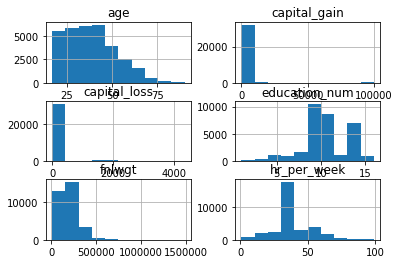

In [21]:
adult.hist()

# Worksheet 3 M2T4
How might I find out how to make my histogram printout bigger?

Look up the histogram function on Google

# Worksheet 4 M2T4
Make a histogram for all the numerical variables in the men, women, high income men and high income women dataframe.

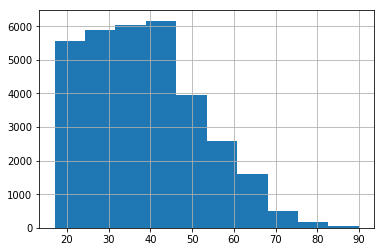

In [24]:
# make a histogram for a single column
adult['age'].hist()

different method...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122c23750>]],
      dtype=object)

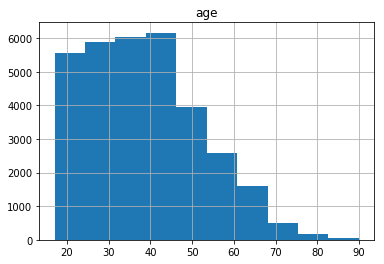

In [25]:
adult.hist(column = 'age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1231e5d90>,
      dtype=object)

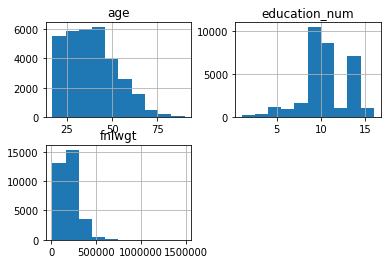

In [27]:
# make several histograms
adult.hist(column = ['age', 'fnlwgt', 'education_num'])

Some questions to ask yourself at this point
* do any variable seem not useful or redundant?
* are there better (wider/narrowed) bin widths for histograms?
* should we turn any of the numerical variables into categorical variables?
* any unexpected distributions?
* any immediate apparent outliers?

## Center and Distance -- Median and InterQuartile Range (IQR)

Median is another kind of average, the measure that captures the middle data point (if odd number of data points) or the man of the middle two data points (if even number of data points)

In [29]:
# computer the median
adult['age'].median()

37.0

# Worksheet 5 M2T4

Find the median ages of the men, women, high income men and high income women.

In [31]:
men['age'].median()

38.0

In [32]:
women['age'].median()

35.0

In [33]:
men_high_income['age'].median()

44.0

In [34]:
women_high_income['age'].median()

41.0

## Quantiles

A way to split up the dataset into equal sized pieces.

- percentiles chop up data into 100 pieces
- quartiles chop up data into 4 pieces

Example: 
Consider the dataset {1, 2, 24, 36, 1345}
- 1 is the 0th percentile
- 2 is the 25th percentile
- 24 is the 50th percentile
- 36 is the 75th percentile
- 1345 is the 100th percentile

# Worksheet 6 M2T4

What is another name for the 50% percentile?

median

Quantiles aren't always in the dataset, e.g.

the 50th percentile of the data set {1,2} is 1.5. 

In [35]:
# computing quantiles

adult['age'].quantile(0.1) #10th percentile

22.0

In [36]:
adult['age']quantile(0.25) #25th percentile or first quartile

SyntaxError: invalid syntax (<ipython-input-36-4d0faaf401af>, line 1)

# Worksheet 8 M2T4

Define a function (using def) that measure the IQR and apply it to adult['age']

In [37]:
def IQR(x):
    return x.quantile(.75) - x.quantile(.25)

IQR(adult['age'])

20.0